In [71]:
def inputChastProizv():
    from mpl_toolkits import mplot3d
    import numpy as np
    import matplotlib.pyplot as plt

    params = input('Введите названия переменных: ')
    params = params.split(' ')
    if len(params) > 2:
        print('Введено более двух переменных')
    elif len(params) < 2:
        print('Введено менее двух переменных')
    F = input('Функция в аналитическом виде :  ')
    L = input('Есть ли ограничения, 1 - да; 0 нет : ')
    if L == '1':
        lim1 = input(f'Ограничения для {params[0]} через пробел :  ')
        lim2 = input(f'Ограничения для {params[1]} через пробел :  ')
    elif L =='0':
        lim1 = ('999')
        lim2 = ('999')
    else :
        return 'Ошибка ввода наличия ограничений'
    lim1 = list(map(float, (lim1.split(' '))))
    lim2 = list(map(float, (lim2.split(' '))))
    Final = {'p1': params[0],
             'p2': params[1],
             'func': F,
             'lims1': lim1,
             'lims2': lim2}
    return Final



In [72]:
from sympy import *
def chastproizv(dictionary):
    # преобразование данных для символьного вычислнения
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator
    from sympy.parsing.sympy_parser import parse_expr
    
    data = dictionary
    func = data['func']
    func = parse_expr(func)
    p1 = data['p1']
    x = Symbol(p1)
    p2 = data['p2']
    y = Symbol(p2)
    lim1 = data['lims1']
    lim2 = data['lims2']
    # реализация метода
    
    dx = func.diff(p1)
    dy = func.diff(p2)
    points = solve((dx,dy), [x,y], dict = True)
    A = dx.diff(p1)
    B = dx.diff(p2)
    C = dy.diff(p2)
    for i in points:
        A = A.subs([(x, i[x]), (y, i[y])])
        B = B.subs([(x, i[x]), (y, i[y])])
        C = C.subs([(x, i[x]), (y, i[y])])
        if A*C-B**2>0:
            if A>0:
                print(i, 'условный минимум')
            elif A<0:
                print(i, 'условный максимум')
        elif A*C-B**2<0:
            print(f'В точке {i} нет экстремума - седловая точка')
        else:
            print(i, 'Требуется дополнительное исследование')
     
    %matplotlib notebook

    plt.rcParams['figure.figsize'] = (8,6)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    if len(lim1) == 2 :
        xx = np.linspace(lim1[0] - 5, lim1[1] + 5, 1000)
        yy = np.linspace(lim2[0] - 5, lim2[1] + 5, 1000)
    
    else:
        xx = np.linspace(-20, 20, 1000)
        yy = np.linspace(-20, 20, 1000)
    
    X, Y = np.meshgrid(xx, yy)

    f = lambdify([x,y], func)
    Z = f(X,Y)

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5,
                       linewidth=0, antialiased=False)
    if len(lim1) == 2 :
        coord_x_p = np.array([float(i[x]) for i in points if (float(i[x]) >= lim1[0] and int(i[x]) <= lim1[1])]) 
        coord_y_p = np.array([float(i[y]) for i in points if (float(i[y]) >= lim2[0] and int(i[y]) <= lim2[1])])
        coord_z_p = f(coord_x_p, coord_y_p)
    else:
        coord_x_p = np.array([float(i[x]) for i in points]) 
        coord_y_p = np.array([float(i[y]) for i in points])
        coord_z_p = f(coord_x_p, coord_y_p)
    
    ax.scatter3D(coord_x_p, coord_y_p, coord_z_p,c = 'yellow', s=250, alpha=1)
    ax.set_xlabel(f'{x}')
    ax.set_ylabel(f'{y}')
    ax.set_zlabel(f'{func}')
    plt.show()  

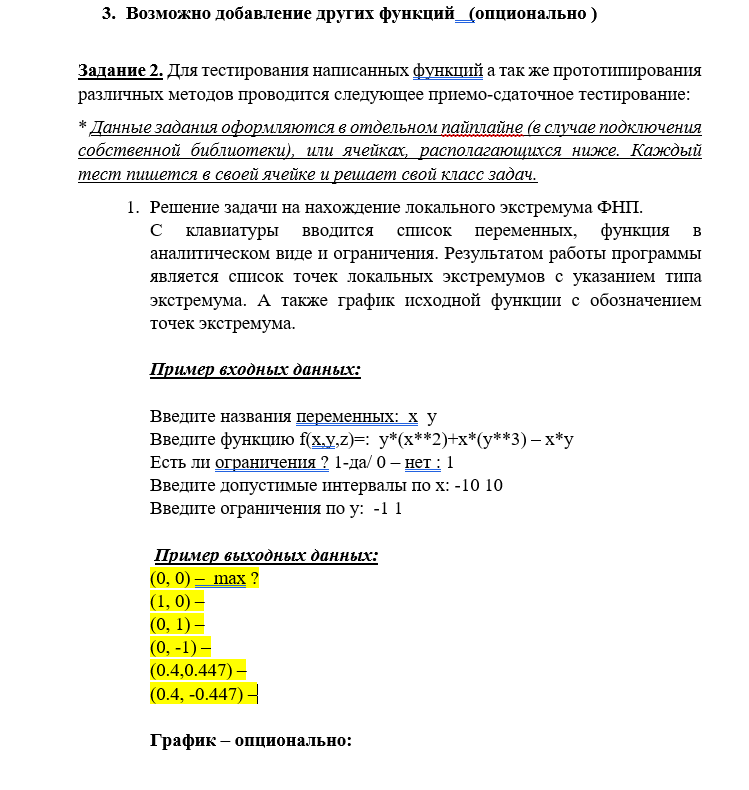

Введите названия переменных: x y
Функция в аналитическом виде :  y*(x**2) + x*(y**3) - x*y
Есть ли ограничения, 1 - да; 0 нет : 1
Ограничения для x через пробел :  -10 10
Ограничения для y через пробел :  -1 1
В точке {x: 0, y: -1} нет экстремума - седловая точка
В точке {x: 0, y: 0} нет экстремума - седловая точка
В точке {x: 0, y: 1} нет экстремума - седловая точка
В точке {x: 2/5, y: -sqrt(5)/5} нет экстремума - седловая точка
В точке {x: 2/5, y: sqrt(5)/5} нет экстремума - седловая точка
В точке {x: 1, y: 0} нет экстремума - седловая точка


<IPython.core.display.Javascript object>


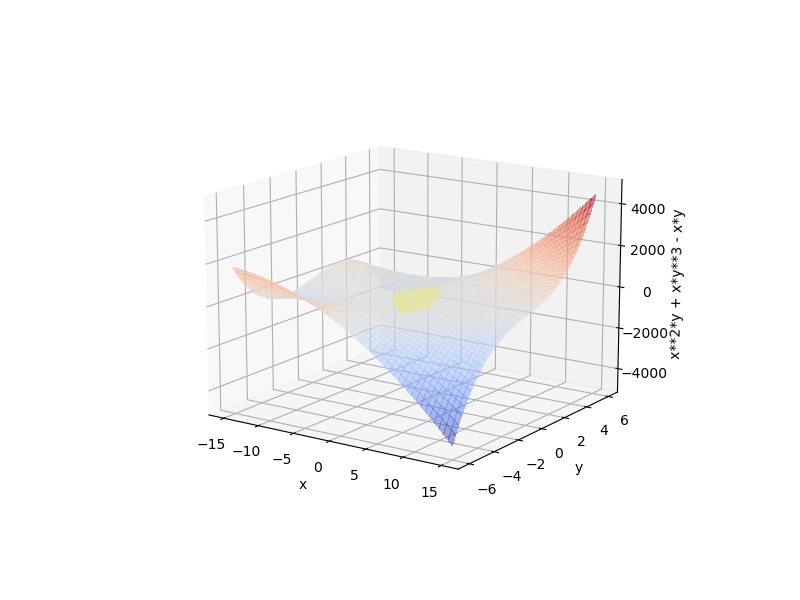

In [73]:
chastproizv(inputChastProizv())